In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
census = pd.read_csv("/content/drive/MyDrive/census_data.csv")

In [ ]:
census.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   gender          32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income_bracket  32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
census['income_bracket'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
def label_fix(label):
    if label==' <=50K':
        return 0
    else:
        return 1

In [ ]:
census['income_bracket'] = census['income_bracket'].apply(label_fix)

In [ ]:
census['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
workclass = pd.get_dummies(census['workclass'],drop_first=True)

In [ ]:
workclass

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False
2,False,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False,False
4,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...
32556,False,False,False,True,False,False,False,False
32557,False,False,False,True,False,False,False,False
32558,False,False,False,True,False,False,False,False
32559,False,False,False,True,False,False,False,False


In [ ]:
census = pd.concat([census.drop('workclass',axis=1),workclass],axis=1)

In [ ]:
census['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [ ]:
education = pd.get_dummies(census['education'],drop_first=True)

In [ ]:
census = pd.concat([census.drop('education',axis=1),education],axis=1)

In [ ]:
census['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [ ]:
marital_status = pd.get_dummies(census['marital_status'],drop_first=True)

In [ ]:
census = pd.concat([census.drop('marital_status',axis=1),marital_status],axis=1)

In [ ]:
census['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
occupation = pd.get_dummies(census['occupation'],drop_first=True)

In [ ]:
census = pd.concat([census.drop('occupation',axis=1),occupation],axis=1)

In [ ]:
census['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [ ]:
relationship = pd.get_dummies(census['relationship'],drop_first=True)

In [ ]:
census = pd.concat([census.drop('relationship',axis=1),relationship],axis=1)

In [ ]:
census['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [ ]:
race = pd.get_dummies(census['race'],drop_first=True)

In [ ]:
census = pd.concat([census.drop('race',axis=1),race],axis=1)

In [ ]:
census['gender'].unique()

array([' Male', ' Female'], dtype=object)

In [ ]:
gender = pd.get_dummies(census['gender'],drop_first=True)

In [ ]:
census = pd.concat([census.drop('gender',axis=1),gender],axis=1)

In [ ]:
census['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
native_country = pd.get_dummies(census['native_country'],drop_first=True)

In [ ]:
census = pd.concat([census.drop('native_country',axis=1),native_country],axis=1)

In [ ]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 100 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          32561 non-null  int64
 1   education_num                32561 non-null  int64
 2   capital_gain                 32561 non-null  int64
 3   capital_loss                 32561 non-null  int64
 4   hours_per_week               32561 non-null  int64
 5   income_bracket               32561 non-null  int64
 6    Federal-gov                 32561 non-null  bool 
 7    Local-gov                   32561 non-null  bool 
 8    Never-worked                32561 non-null  bool 
 9    Private                     32561 non-null  bool 
 10   Self-emp-inc                32561 non-null  bool 
 11   Self-emp-not-inc            32561 non-null  bool 
 12   State-gov                   32561 non-null  bool 
 13   Without-pay                 32561 non-null  

In [ ]:
X = census.drop('income_bracket', axis=1)
y = census['income_bracket']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
scaled_X_test = scaler.transform(X_test)

In [ ]:
scaled_X_train.shape

(26048, 99)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [ ]:
model = Sequential()

# input layer
model.add(Dense(99,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(49, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
# model.add(Dense(24, activation='relu'))
# model.add(Dropout(0.2))

# hidden layer
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
# model.add(Dense(6, activation='relu'))
# model.add(Dropout(0.2))

# hidden layer
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',   # Metric to monitor (can be 'val_accuracy' or any other metric)
    patience=3,           # Number of epochs to wait before stopping if no improvement
    verbose=1,            # Output status when early stopping occurs
    restore_best_weights=True  # Restore the weights of the best epoch
)

In [ ]:
model.fit(x=scaled_X_train,
          y=y_train,
          epochs=250,
          batch_size=256,
          validation_data=(scaled_X_test, y_test),
          callbacks=[early_stopping],
          )

Epoch 1/250
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6295 - loss: 0.6509 - val_accuracy: 0.7643 - val_loss: 0.4031
Epoch 2/250
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7992 - loss: 0.4514 - val_accuracy: 0.8377 - val_loss: 0.3542
Epoch 3/250
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8240 - loss: 0.4278 - val_accuracy: 0.8414 - val_loss: 0.3437
Epoch 4/250
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8330 - loss: 0.4136 - val_accuracy: 0.8442 - val_loss: 0.3434
Epoch 5/250
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8311 - loss: 0.4097 - val_accuracy: 0.8425 - val_loss: 0.3375
Epoch 6/250
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8344 - loss: 0.4056 - val_accuracy: 0.8432 - val_loss: 0.3362
Epoch 7/250
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8359 - loss: 0.3897 - val_accuracy: 0.8455 - val_loss: 0.3296
Epoch 8/250
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8402 - loss: 0.3868 - val_accu

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

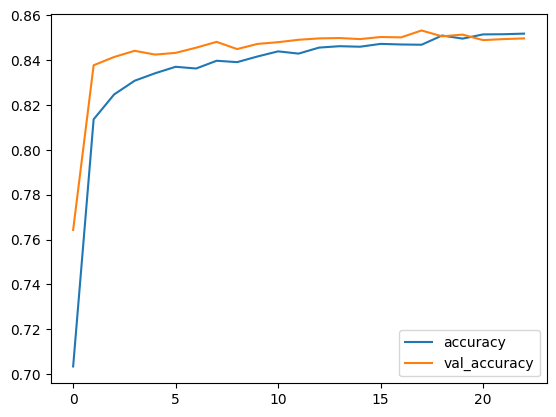

In [ ]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

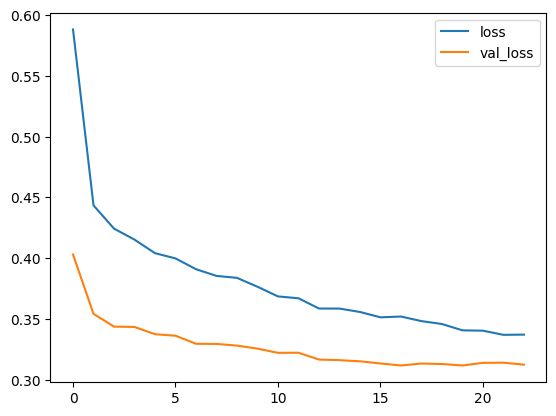

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict(scaled_X_test)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print(classification_report(y_test,predictions.round()))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4972
           1       0.72      0.61      0.66      1541

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



In [ ]:
confusion_matrix(y_test,predictions.round())

array([[4605,  367],
       [ 601,  940]])

In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(census))

new_record = census.drop('income_bracket',axis=1).iloc[random_ind]
new_record

,19043
age,30
education_num,10
capital_gain,0
capital_loss,0
hours_per_week,40
...,...
Thailand,False
Trinadad&Tobago,False
United-States,True
Vietnam,False


In [ ]:
new_record = scaler.transform(new_record.values.reshape(1,99))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
new_record

array([[0.17808219, 0.6       , 0.        , 0.        , 0.39795918,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
income_bracket = model.predict(new_record)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
income_bracket.round()

array([[0.]], dtype=float32)

In [ ]:
census.iloc[random_ind]['income_bracket']

0

In [ ]:
# This person's income is less than 50K